# Basics of OpenCV

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def matplotlib_imshow(image, title = 'image',cmap=None):
    """Display an image using matplotlib."""
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
import os
cwd = os.getcwd()
print(cwd)

print(os.path.abspath('.'))
cat1_path = 'images/cats/chester-pic-1.jpg'
cat1_path_abs = os.path.join(cwd, cat1_path)

/run/media/runtime_terror/mass storage/coding/courses/LearnOpenCV
/run/media/runtime_terror/mass storage/coding/courses/LearnOpenCV


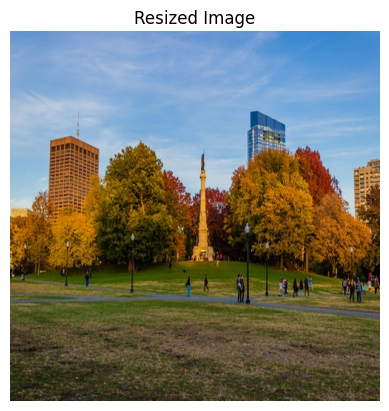

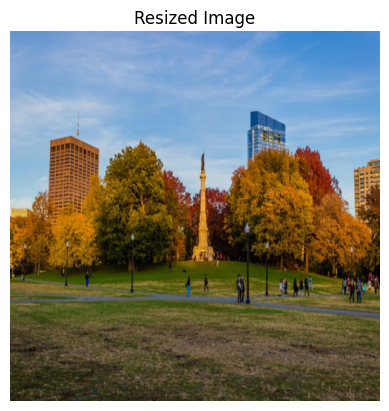

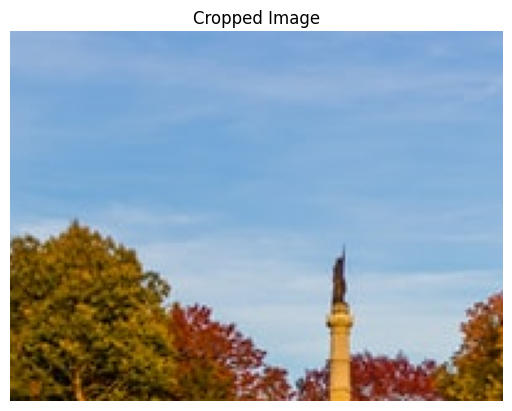

In [13]:
park_image_path = os.path.join(cwd, 'Resources', 'Photos', 'park.jpg')
# Read in an image
img = cv2.imread(park_image_path)

resized = cv2.resize(img, (500,500), interpolation=cv2.INTER_CUBIC)
matplotlib_imshow(resized, title='Resized Image')

resized = cv2.resize(img, (500,500), interpolation=cv2.INTER_LINEAR)
matplotlib_imshow(resized, title='Resized Image')

cropped = img[50:200, 200:400]
matplotlib_imshow(cropped, title='Cropped Image')

(4032, 3024, 3)
4032
3024
(600, 400, 3)


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/run/media/runtime_terror/mass storage/coding/courses/LearnOpenCV/.venv/lib64/python3.14/site-packages/cv2/qt/plugins"


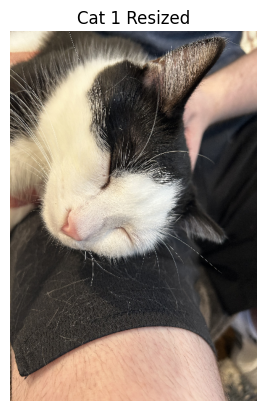

In [ ]:
cat1 = cv2.imread(cat1_path_abs)
print(cat1.shape)
print(cat1.shape[0])  # height
print(cat1.shape[1])  # width
cat1_resized = cv2.resize(cat1, (400, 600))
print(cat1_resized.shape)

# cv2.imshow('Cat 1 Resized', cat1_resized)
# cv2.waitKey(0)

matplotlib_imshow(cat1_resized, title='Cat 1 Resized')

(2016, 1512, 3)


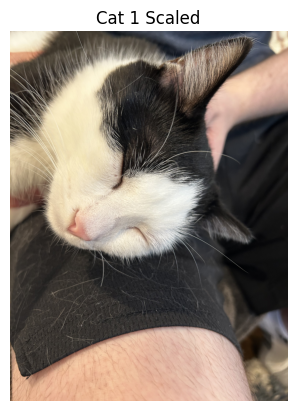

In [8]:
def scale_image(image,scale):
    """Scale an image by a given percentage."""
    width = int(image.shape[1] * scale / 100)
    height = int(image.shape[0] * scale / 100)
    dim = (width, height)
    resized = cv2.resize(image, dim)
    return resized

cat1_scaled = scale_image(cat1, 50)
print(cat1_scaled.shape)
# cv2.imshow('Cat 1 Scaled', cat1_scaled)
# cv2.waitKey(0)
matplotlib_imshow(cat1_scaled, title='Cat 1 Scaled')

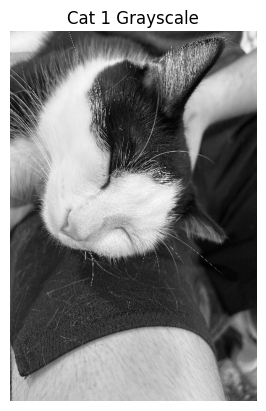

In [5]:
cat1_gray = cv2.cvtColor(cat1_resized, cv2.COLOR_BGR2GRAY)
# cv2.imshow('Cat 1 Grayscale', cat1_gray)
# cv2.waitKey(0)

matplotlib_imshow(cat1_gray, title='Cat 1 Grayscale', cmap='gray')

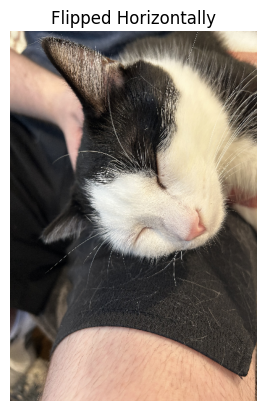

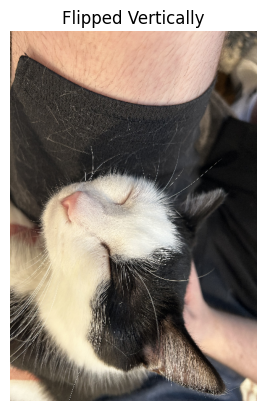

In [10]:
flipped_horizontally = cv2.flip(cat1_resized, 1)
# cv2.imshow('Flipped Horizontally', flipped_horizontally)
# cv2.waitKey(0)
matplotlib_imshow(flipped_horizontally, title='Flipped Horizontally')

flipped_vertically = cv2.flip(cat1_resized, 0)
# cv2.imshow('Flipped Vertically', flipped_vertically)
# cv2.waitKey(0)
matplotlib_imshow(flipped_vertically, title='Flipped Vertically')

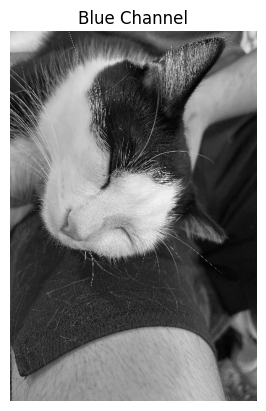

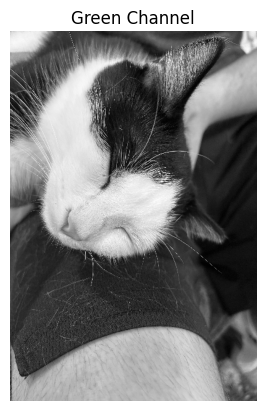

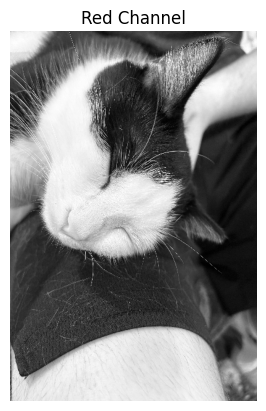

In [6]:
b,g,r = cv2.split(cat1_resized)
# cv2.imshow('Blue Channel', b)
# cv2.imshow('Green Channel', g)
# cv2.imshow('Red Channel', r)
# cv2.waitKey(0)

matplotlib_imshow(b, title='Blue Channel', cmap='gray')
matplotlib_imshow(g, title='Green Channel', cmap='gray')
matplotlib_imshow(r, title='Red Channel', cmap='gray')

BGR ↔ HSV (Hue, Saturation, Value)
This is the most common conversion you'll do for computer vision.

Why use it? HSV separates color information (Hue) from brightness/intensity (Value). This makes it fantastic for object tracking based on color. For example, if you want to find a "red ball," the lighting can change (making it a dark red or a bright red), but the hue will stay relatively constant. Trying to segment a "red" object in BGR is very difficult because you need a complex range for B, G, and R values. In HSV, you just look for a narrow range of Hue.

OpenCV Code: cv2.COLOR_BGR2HSV or cv2.COLOR_BGR2HLS (Lightness).

Pro Tip: In OpenCV, the Hue (H) channel is 8-bit, so its values range from 0-179, not 0-360. Saturation (S) and Value (V) range from 0-255.

In [ ]:

# Convert BGR to RGB
rgb_image = cv2.cvtColor(cat1_resized, cv2.COLOR_BGR2RGB)
print(f"RGB: {rgb_image}") # Output: [[[255 0 0]]]

# Convert BGR to HSV (Hue, Saturation, Value)
hsv_image = cv2.cvtColor(cat1_resized, cv2.COLOR_BGR2HSV)
print(f"HSV: {hsv_image}") # Output: [[[ 0 255 255]]] (Hue=0 is red)

# Convert BGR to CIELAB (L*a*b*)
lab_image = cv2.cvtColor(cat1_resized, cv2.COLOR_BGR2Lab)
print(f"LAB: {lab_image}")

# Convert BGR to YUV (or YCrCb, which is very similar)
yuv_image = cv2.cvtColor(cat1_resized, cv2.COLOR_BGR2YUV)
print(f"YUV: {yuv_image}")

RGB: [[[197 183 170]
  [212 199 180]
  [208 196 174]
  ...
  [242 232 207]
  [238 224 197]
  [217 193 165]]

 [[213 200 181]
  [207 194 175]
  [226 213 194]
  ...
  [240 230 205]
  [230 216 189]
  [216 193 165]]

 [[225 214 194]
  [228 217 197]
  [225 216 197]
  ...
  [244 234 207]
  [242 227 198]
  [210 186 158]]

 ...

 [[ 97  74  52]
  [130  99  74]
  [139 104  77]
  ...
  [ 90  80  70]
  [ 84  74  64]
  [ 81  71  61]]

 [[103  81  57]
  [152 116  89]
  [139 103  75]
  ...
  [ 82  73  64]
  [ 79  71  64]
  [ 68  61  53]]

 [[116  94  71]
  [147 111  87]
  [183 149 121]
  ...
  [ 71  62  53]
  [ 64  61  54]
  [ 56  53  46]]]
HSV: [[[ 14  35 197]
  [ 18  38 212]
  [ 19  42 208]
  ...
  [ 21  37 242]
  [ 20  44 238]
  [ 16  61 217]]

 [[ 18  38 213]
  [ 18  39 207]
  [ 18  36 226]
  ...
  [ 21  37 240]
  [ 20  45 230]
  [ 16  60 216]]

 [[ 19  35 225]
  [ 19  35 228]
  [ 20  32 225]
  ...
  [ 22  39 244]
  [ 20  46 242]
  [ 16  63 210]]

 ...

 [[ 15 118  97]
  [ 13 110 130]
  [ 13 114